# Data Mining - Assignment #2 - Clustering
### Problem C: Use the Silhouette Coefficient to find the best number of clusters k for the data set.
i.e. run the k-mean algorithm for k = 1, 2,….,40 and calculate the Silhouette Coefficient. Generate a graph where you plot the Silhouette Coefficient as a function of the number of cluster k=1...40.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import silhouette_score

### Load and merge Mnist test and train datasets:

In [11]:
mnist_test = pd.read_csv(r"mnist_test.csv", sep=",")
mnist_train = pd.read_csv(r"mnist_train.csv", sep=",")
mnist = pd.concat([mnist_train, mnist_test], ignore_index=True)
mnist.sample(20)

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
25937,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22637,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62953,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31747,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20966,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8505,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32801,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49859,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7632,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Load KMean Functions that implemented in the previous steps (A & B):

In [12]:
from kmean import Cosine_IterativeKMean, Euclidean_IterativeKMean

Convert the dataframe to arrays that the k-mean function accepts

In [13]:
# Create the labels array (y) by selecting only the label column
true_labels = mnist['label'].to_numpy()
# Create the features array (X) by dropping the label column
features = mnist.drop(columns=['label'], axis=1).to_numpy()

### 1- When Euclidean distance is used as the distance measure for clustering

In [14]:
cof=[]
max_k = 40
for k in range(1,max_k+1):
    print(f"k={k}")
    max_iter=20
    results = Euclidean_IterativeKMean(features[:10000, :], true_labels[:10000], k=k, max_iter=max_iter, include_cost=False, include_accuracy=False, include_silhouette=True)
    cof.append(results["silhouette"])
cof

k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
k=11
k=12
k=13
k=14
k=15
k=16
k=17
k=18
k=19
k=20
k=21
k=22
k=23
k=24
k=25
k=26
k=27
k=28
k=29
k=30
k=31
k=32
k=33
k=34
k=35
k=36
k=37
k=38
k=39
k=40


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.08362015898249459,
  0.0953845297340862,
  0.09959071626917687,
  0.0984440380052416,
  0.09693189776849843,
  0.09570570447626157,
  0.09482515110886613,
  0.09403177979417275,
  0.09336995720918706,
  0.09276904096406584,
  0.09231840818788027,
  0.09190995890510527,
  0.09160770526609678,
  0.09137492422962395,
  0.09112956231879707,
  0.09099163730373368,
  0.09096005466667893,
  0.09088586976972465,
  0.09081792559042505,
  0.09078466885241576],
 [0.08286608687069177,
  0.08698702330363606,
  0.0848676064162713,
  0.0822434302281915,
  0.07968313039331247,
  0.07735357047649269,
  0.07539763924938642,
  0.0737406040115892,
  0.07241143261425038,
  0.07106735226912538,
  0.06981476446898585,
  0.06859631709886937,
  0.0673979112969504,
  0.06594913751718036,
  0.06476620721351095,
  0.06339834758058639,
  0.062052240415142616,
  0.06104975103584016,
  0.05992494810868017,
  0.05906721591401572],
 [0.0376538635809217

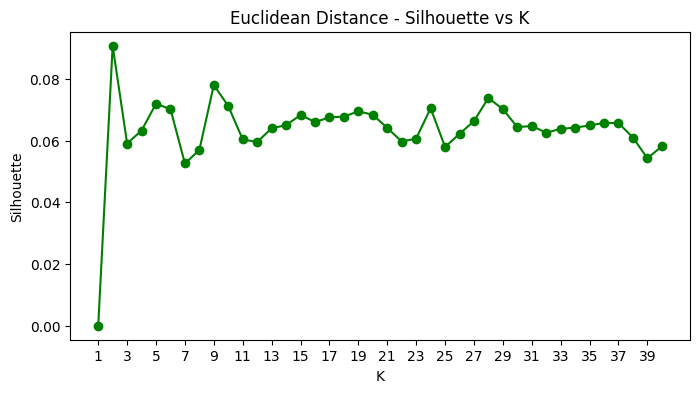

In [20]:
iterations = range(1, max_k + 1)

plt.figure(figsize=(8, 4))
plt.plot(iterations, np.array(cof)[:,-1], 'g-o')
plt.title("Euclidean Distance - Silhouette vs K")
plt.ylabel("Silhouette")
plt.xlabel("K")
plt.xticks(np.arange(1, max_k + 1, 2)) # Set step size to 2
plt.show()


### 2- When Cosine Similarity is used as the distance measure for clustering

In [21]:
cof2=[]
max_k = 40
for k in range(1, max_k + 1):
    print(f"k={k}")
    max_iter=20
    results2 = Cosine_IterativeKMean(features[:10000, :], true_labels[:10000], k=k, max_iter=max_iter, include_cost=False, include_accuracy=False, include_silhouette=True)
    cof2.append(results2["silhouette"])
cof2

k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9
k=10
k=11
k=12
k=13
k=14
k=15
k=16
k=17
k=18
k=19
k=20
k=21
k=22
k=23
k=24
k=25
k=26
k=27
k=28
k=29
k=30
k=31
k=32
k=33
k=34
k=35
k=36
k=37
k=38
k=39
k=40


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.03327536301953077,
  0.041188450185351715,
  0.04548023306489694,
  0.05027343783128145,
  0.053940390036652935,
  0.05733425117666452,
  0.05884764987802735,
  0.059501709094886016,
  0.059732853932862165,
  0.059804047212509225,
  0.05980716559094177,
  0.0598273407724978,
  0.059826574449620536,
  0.059828518392225166,
  0.059828518392225194,
  0.059828518392225145,
  0.059828518392225194,
  0.059828518392225194,
  0.059828518392225166,
  0.059828518392225194],
 [0.03983852079538177,
  0.0500349856044771,
  0.052743385752119044,
  0.055968941733992576,
  0.05925407228644841,
  0.06134518724900081,
  0.06226578186601441,
  0.06321305669588005,
  0.06413998439784017,
  0.06532257731689088,
  0.06646509716588393,
  0.0674973210219504,
  0.06810794528540394,
  0.06850926594840936,
  0.06880959305179245,
  0.0690248472362635,
  0.06919022829050585,
  0.06937232928834926,
  0.06955911600249129,
  0.06984073368431078],
 [0.

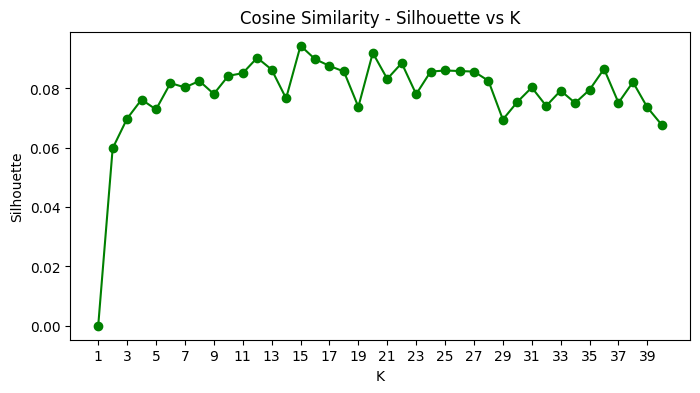

In [22]:
iterations = range(1, max_k + 1)

plt.figure(figsize=(8, 4))
plt.plot(iterations, np.array(cof2)[:,-1], 'g-o')
plt.title("Cosine Similarity - Silhouette vs K")
plt.ylabel("Silhouette")
plt.xlabel("K")
plt.xticks(np.arange(1, max_k + 1, 2)) # Set step size to 2
plt.show()
